In [1]:
import os
os.chdir(r"C:\Users\colli\OneDrive\Documents\Parkinsons Project Regis")
import pandas as pd
import glob

In [2]:
subjects = pd.read_csv('subjects.csv')

In [3]:
events = pd.read_csv('events.csv')

In [4]:
tasks = pd.read_csv('tasks.csv')

In [5]:
meta = pd.read_csv('tdcsfog_metadata.csv')

In [6]:
defog = pd.read_csv('defog_metadata.csv')

In [7]:
sub = pd.read_csv('sample_submission.csv')

In [8]:
test = glob.glob('test/**/**')

In [9]:
def reader(f):
    df = pd.read_csv(f)
    df['Id'] = f.split('\\\\')[-1].split('.')[0]
    return df

In [10]:
# read train data
test = pd.concat([reader(f) for f in test]).fillna(0); print(test.shape)
cols = [c for c in test.columns if c not in ['Id', 'StartHesitation', 'Turn' , 'Walking', 'Valid', 'Task','Event']] # except categorical and target fetaure

(286370, 5)


In [11]:
subjects.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20


In [12]:
subjects.isnull().sum()

Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64

In [13]:
import seaborn as sns

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

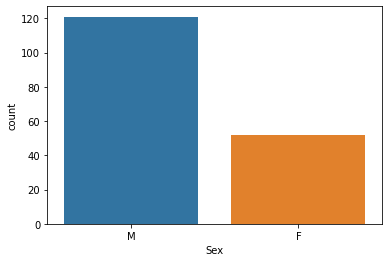

In [14]:
#EDA Subjects data
sns.countplot(subjects['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

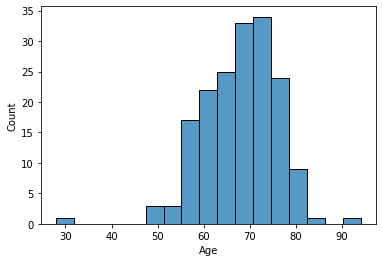

In [15]:
sns.histplot(subjects['Age'])

<AxesSubplot:xlabel='YearsSinceDx', ylabel='Count'>

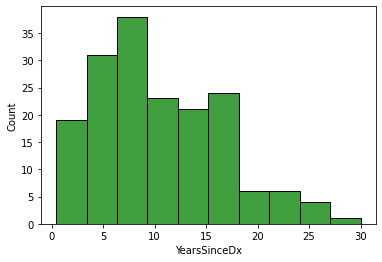

In [16]:
sns.histplot(subjects['YearsSinceDx'], color = 'green')

<AxesSubplot:xlabel='UPDRSIII_On', ylabel='Count'>

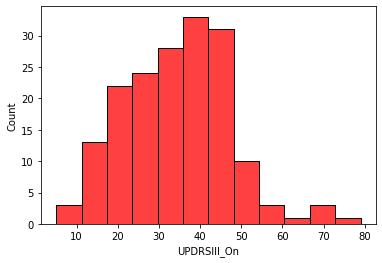

In [17]:
sns.histplot(subjects['UPDRSIII_On'], color = 'red')

<AxesSubplot:xlabel='UPDRSIII_Off', ylabel='Count'>

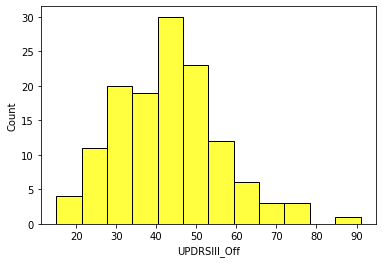

In [18]:
sns.histplot(subjects['UPDRSIII_Off'], color = 'yellow')

In [19]:
tasks.head()

,Id,Begin,End,Task
0,02ab235146,10.00,190.48,Rest1
1,02ab235146,211.24,271.56,Rest2
2,02ab235146,505.88,522.40,4MW
3,02ab235146,577.96,594.64,4MW-C
4,02ab235146,701.32,715.28,MB1


In [20]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB


In [21]:
tasks['Task'].unique()

array(['Rest1', 'Rest2', '4MW', '4MW-C', 'MB1', 'MB2a', 'MB2b', 'MB3-R',
       'MB3-L', 'MB4', 'MB5', 'MB6-R', 'MB6-L', 'MB7', 'MB8', 'MB9',
       'MB10', 'MB11', 'MB12', 'MB13', 'TUG-ST', 'TUG-DT', 'TUG-C',
       'Turning-ST', 'Turning-DT', 'Turning-C', 'Hotspot1', 'Hotspot1-C',
       'Hotspot2', 'Hotspot2-C', 'MB6'], dtype=object)

In [22]:
tasks['Length'] = tasks['End'] - tasks['Begin']

In [23]:
tasks.head()

,Id,Begin,End,Task,Length
0,02ab235146,10.00,190.48,Rest1,180.48
1,02ab235146,211.24,271.56,Rest2,60.32
2,02ab235146,505.88,522.40,4MW,16.52
3,02ab235146,577.96,594.64,4MW-C,16.68
4,02ab235146,701.32,715.28,MB1,13.96


In [24]:
tasks.groupby('Task')['Length'].mean()

Task
4MW            16.742168
4MW-C          18.444077
Hotspot1       19.805146
Hotspot1-C     19.661356
Hotspot2       57.677015
Hotspot2-C     57.270153
MB1             5.218015
MB10           12.152212
MB11           10.900179
MB12            7.263586
MB13            8.758779
MB2a            6.845810
MB2b            6.760318
MB3-L          13.335517
MB3-R          12.237815
MB4             3.902638
MB5             4.530712
MB6             4.023333
MB6-L           4.158355
MB6-R           4.162885
MB7            30.991477
MB8            21.458338
MB9            30.580231
Rest1         178.256378
Rest2          60.590000
TUG-C          19.021294
TUG-DT         22.462824
TUG-ST         16.011014
Turning-C      52.903918
Turning-DT     72.360219
Turning-ST     56.416672
Name: Length, dtype: float64

In [25]:
defog.head()

,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on


C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Visit', ylabel='count'>

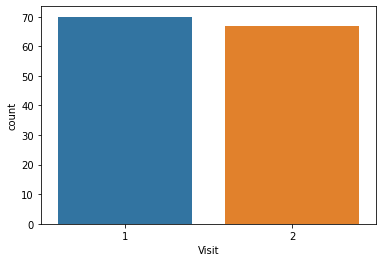

In [26]:
sns.countplot(defog['Visit'])

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medication', ylabel='count'>

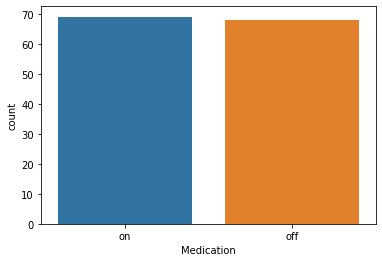

In [27]:
sns.countplot(defog['Medication'])

In [28]:
meta.head()

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on


In [29]:
join_df = pd.merge(defog, subjects, how='left', on='Subject').fillna(-1)

In [30]:
join_df.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28
1,02ab235146,ab54e1,2,on,2.0,79,F,8.0,38.0,64.0,28
2,02ea782681,bf608b,2,on,1.0,67,M,7.0,15.0,48.0,23
3,02ea782681,bf608b,2,on,2.0,67,M,7.0,14.0,57.0,19
4,06414383cf,c0b71e,2,off,1.0,61,F,7.0,45.0,52.0,22


In [31]:
join_df2 = pd.merge(meta, subjects, how='left', on='Subject').fillna(-1)

In [32]:
join_df2.head()

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,13abfd,3,2,on,-1.0,68,F,9.0,17.0,15.0,15
1,009ee11563,d81e3a,4,2,on,-1.0,71,M,10.0,42.0,-1.0,24
2,011322847a,203e85,2,2,on,-1.0,67,M,12.0,27.0,28.0,19
3,01d0fe7266,203e85,2,1,off,-1.0,67,M,12.0,27.0,28.0,19
4,024418ba39,cecfb8,19,3,on,-1.0,60,F,7.0,30.0,-1.0,19


In [33]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            250 non-null    object 
 1   Subject       250 non-null    object 
 2   Visit_x       250 non-null    int64  
 3   Medication    250 non-null    object 
 4   Visit_y       250 non-null    float64
 5   Age           250 non-null    int64  
 6   Sex           250 non-null    object 
 7   YearsSinceDx  250 non-null    float64
 8   UPDRSIII_On   250 non-null    float64
 9   UPDRSIII_Off  250 non-null    float64
 10  NFOGQ         250 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 23.4+ KB


In [34]:
cols1 = ['Visit_x', 'YearsSinceDx','NFOGQ']
join_df[cols1] = join_df[cols1].astype('int8')

In [35]:
cols2 = ['Visit_y', 'YearsSinceDx','UPDRSIII_On','UPDRSIII_Off']
join_df[cols2] = join_df[cols2].astype('float16')

In [36]:
join_df2[cols1] = join_df2[cols1].astype('int8')
join_df2[cols2] = join_df2[cols2].astype('float16')

In [37]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            250 non-null    object 
 1   Subject       250 non-null    object 
 2   Visit_x       250 non-null    int8   
 3   Medication    250 non-null    object 
 4   Visit_y       250 non-null    float16
 5   Age           250 non-null    int64  
 6   Sex           250 non-null    object 
 7   YearsSinceDx  250 non-null    float16
 8   UPDRSIII_On   250 non-null    float16
 9   UPDRSIII_Off  250 non-null    float16
 10  NFOGQ         250 non-null    int8   
dtypes: float16(4), int64(1), int8(2), object(4)
memory usage: 14.2+ KB


In [38]:
events.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0


In [39]:
join_df3 = pd.merge(join_df, events, how='left', on='Id').fillna(-1)

In [40]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,1969.173,1972.535,-1,-1.0
1,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2078.982,2080.524,-1,-1.0
2,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2290.606,2291.952,-1,-1.0
3,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2704.292,2704.770,-1,-1.0
4,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.534,2785.774,-1,-1.0


In [41]:
join_df4 = pd.merge(join_df2, events, how='left', on='Id').fillna(-1)

In [42]:
join_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 1626
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1627 non-null   object 
 1   Subject       1627 non-null   object 
 2   Visit_x       1627 non-null   int8   
 3   Test          1627 non-null   int64  
 4   Medication    1627 non-null   object 
 5   Visit_y       1627 non-null   float16
 6   Age           1627 non-null   int64  
 7   Sex           1627 non-null   object 
 8   YearsSinceDx  1627 non-null   float16
 9   UPDRSIII_On   1627 non-null   float16
 10  UPDRSIII_Off  1627 non-null   float16
 11  NFOGQ         1627 non-null   int8   
 12  Init          1627 non-null   float64
 13  Completion    1627 non-null   float64
 14  Type          1627 non-null   object 
 15  Kinetic       1627 non-null   float64
dtypes: float16(4), float64(3), int64(2), int8(2), object(5)
memory usage: 155.7+ KB


In [43]:
join_df3 = join_df3.drop(join_df3['Visit_y'])

In [44]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,1969.173,1972.535,-1,-1.0
3,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2704.292,2704.770,-1,-1.0
4,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.534,2785.774,-1,-1.0
5,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.786,2786.344,-1,-1.0
6,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2827.264,2829.428,-1,-1.0


In [45]:
column_list = ['Id','Subject','Visit_x','Medication','Age','Sex','YearsSinceDx','UPDRSIII_On','UPDRSIII_Off','NFOGQ','Init','Completion','Type','Kinetic']

In [46]:
join_df4 = join_df4[column_list]

In [47]:
join_df4.head()

,Id,Subject,Visit_x,Medication,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,003f117e14,13abfd,3,on,68,F,9.0,17.0,15.0,15,8.61312,14.7731,Turn,1.0
1,009ee11563,d81e3a,4,on,71,M,10.0,42.0,-1.0,24,11.38470,41.1847,Turn,1.0
2,009ee11563,d81e3a,4,on,71,M,10.0,42.0,-1.0,24,54.66470,58.7847,Turn,1.0
3,011322847a,203e85,2,on,67,M,12.0,27.0,28.0,19,28.09660,30.2966,Turn,1.0
4,01d0fe7266,203e85,2,off,67,M,12.0,27.0,28.0,19,30.31840,31.8784,Turn,1.0


In [48]:
cols2 = ['Init', 'Completion','Kinetic']
join_df3[cols2] = join_df3[cols2].astype('float16')
cols3 = ['Age']
join_df3[cols3] = join_df3[cols3].astype('int8')

In [49]:
cols2 = ['Init', 'Completion','Kinetic']
join_df4[cols2] = join_df4[cols2].astype('float16')
cols3 = ['Age']
join_df4[cols3] = join_df4[cols3].astype('int8')

In [50]:
join_df3['Type'] = join_df3['Type'].astype('category')

In [51]:
join_df4['Type'] = join_df4['Type'].astype('category')

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

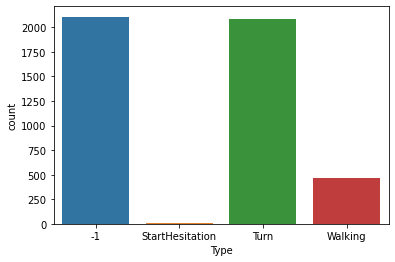

In [52]:
sns.countplot(join_df3['Type'])

<AxesSubplot:xlabel='Type', ylabel='count'>

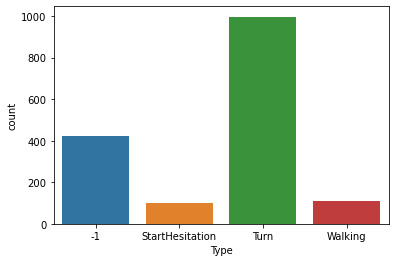

In [53]:
sns.countplot(join_df4['Type'])

In [54]:
join_df3 = join_df3[join_df3.Type != -1]

In [55]:
join_df4 = join_df4[join_df4.Type != -1]

In [56]:
join_df3 = pd.get_dummies(join_df3
               ,columns = ['Type']
               )

In [57]:
join_df4 = pd.get_dummies(join_df4
               ,columns = ['Type']
               )

In [58]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Kinetic,Type_-1,Type_StartHesitation,Type_Turn,Type_Walking
14,02ea782681,bf608b,2,on,1.0,67,M,7.0,15.0,48.0,23,1395.00,1396.00,1.0,0,0,1,0
15,02ea782681,bf608b,2,on,1.0,67,M,7.0,15.0,48.0,23,1484.00,1484.00,1.0,0,0,1,0
16,02ea782681,bf608b,2,on,2.0,67,M,7.0,14.0,57.0,19,1395.00,1396.00,1.0,0,0,1,0
17,02ea782681,bf608b,2,on,2.0,67,M,7.0,14.0,57.0,19,1484.00,1484.00,1.0,0,0,1,0
18,06414383cf,c0b71e,2,off,1.0,61,F,7.0,45.0,52.0,22,433.75,435.25,0.0,0,0,1,0


In [59]:
join_df3['Sex'] = join_df3['Sex'].map({'F': 1, 'M': 0})

In [60]:
join_df3['Medication'] = join_df4['Medication'].map({'on': 1, 'off': 0})

In [61]:
join_df4['Sex'] = join_df3['Sex'].map({'F': 1, 'M': 0})
join_df4['Medication'] = join_df4['Medication'].map({'on': 1, 'off': 0})

In [62]:
all_dfs = [join_df3,join_df4]

In [63]:
all_dfs_concat = pd.concat(all_dfs)

In [64]:
all_dfs_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 14 to 1625
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    3761 non-null   object 
 1   Subject               3761 non-null   object 
 2   Visit_x               3761 non-null   int8   
 3   Medication            1682 non-null   float64
 4   Visit_y               2556 non-null   float16
 5   Age                   3761 non-null   int8   
 6   Sex                   2556 non-null   float64
 7   YearsSinceDx          3761 non-null   float16
 8   UPDRSIII_On           3761 non-null   float16
 9   UPDRSIII_Off          3761 non-null   float16
 10  NFOGQ                 3761 non-null   int8   
 11  Init                  3761 non-null   float16
 12  Completion            3761 non-null   float16
 13  Kinetic               3761 non-null   float16
 14  Type_-1               3761 non-null   uint8  
 15  Type_StartHesitation

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = all_dfs_concat[['Age','YearsSinceDx','UPDRSIII_On','UPDRSIII_Off','NFOGQ','Init','Completion','Kinetic']]
ySH = all_dfs_concat['Type_StartHesitation']
yT = all_dfs_concat['Type_Turn']
yW = all_dfs_concat['Type_Walking']

In [67]:
X_train, X_test, ySH_train, ySH_test = train_test_split(X, ySH, test_size = 0.3, random_state = 22)
X_train, X_test, yT_train, yT_test = train_test_split(X, yT, test_size = 0.3, random_state = 22)
X_train, X_test, yW_train, yW_test = train_test_split(X, yW, test_size = 0.3, random_state = 22)

In [92]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\colli\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)
C:\Users\colli\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


In [68]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clfSH = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clfT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clfW = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [69]:
clfSH.fit(X_train,ySH_train)
clfT.fit(X_train,yT_train)
clfW.fit(X_train,yW_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
ySH_pred = clfSH.predict(X_test)
yT_pred = clfT.predict(X_test)
yW_pred = clfW.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred))
print('Turning:')
print(classification_report(yT_test, yT_pred))
print('Walking:')
print(classification_report(yW_test, yW_pred))

StartHesitation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1090
           1       0.81      0.33      0.47        39

    accuracy                           0.97      1129
   macro avg       0.89      0.67      0.73      1129
weighted avg       0.97      0.97      0.97      1129

Turning:
              precision    recall  f1-score   support

           0       0.86      0.09      0.16       200
           1       0.84      1.00      0.91       929

    accuracy                           0.84      1129
   macro avg       0.85      0.54      0.54      1129
weighted avg       0.84      0.84      0.78      1129

Walking:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       968
           1       1.00      0.07      0.14       161

    accuracy                           0.87      1129
   macro avg       0.93      0.54      0.53      1129
weighted avg       0.89      0.87      

In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [2,3,4,5,6,7,8], 'min_samples_split' : [2,3,4], 'min_samples_leaf': [1,2]}

In [73]:
clfSH2 = DecisionTreeClassifier()
clfT2 = DecisionTreeClassifier()
clfW2 = DecisionTreeClassifier()



In [74]:
searchSH = GridSearchCV(estimator=clfSH2,param_grid = parameters)
searchT = GridSearchCV(estimator=clfT2,param_grid = parameters)
searchW = GridSearchCV(estimator=clfW2,param_grid = parameters)

In [75]:
searchSH.fit(X_train,ySH_train)
searchT.fit(X_train,yT_train)
searchW.fit(X_train,yW_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [76]:
TreemodelSH = searchSH.best_estimator_
TreemodelSH.fit(X_train,ySH_train)

TreemodelT = searchT.best_estimator_
TreemodelT.fit(X_train,yT_train)

TreemodelW = searchW.best_estimator_
TreemodelW.fit(X_train,yW_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=3)

In [77]:
ySH_pred2 = TreemodelSH.predict(X_test)
yT_pred2 = TreemodelT.predict(X_test)
yW_pred2 = TreemodelW.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred2))
print('Turning:')
print(classification_report(yT_test, yT_pred2))
print('Walking:')
print(classification_report(yW_test, yW_pred2))

StartHesitation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1090
           1       0.70      0.49      0.58        39

    accuracy                           0.98      1129
   macro avg       0.84      0.74      0.78      1129
weighted avg       0.97      0.98      0.97      1129

Turning:
              precision    recall  f1-score   support

           0       0.86      0.26      0.39       200
           1       0.86      0.99      0.92       929

    accuracy                           0.86      1129
   macro avg       0.86      0.62      0.66      1129
weighted avg       0.86      0.86      0.83      1129

Walking:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       968
           1       0.76      0.23      0.35       161

    accuracy                           0.88      1129
   macro avg       0.82      0.61      0.64      1129
weighted avg       0.87      0.88      

In [79]:
from sklearn.linear_model import LogisticRegression
LogModelSH = LogisticRegression(solver='lbfgs', max_iter=1000)
LogModelT = LogisticRegression(solver='lbfgs', max_iter=1000)
LogModelW = LogisticRegression(solver='lbfgs', max_iter=1000)

LogModelSH.fit(X_train,ySH_train)
LogModelT.fit(X_train,yT_train)
LogModelW.fit(X_train,yW_train)

ySH_pred3 = LogModelSH.predict(X_test)
yT_pred3 = LogModelT.predict(X_test)
yW_pred3 = LogModelW.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred3, zero_division=0))
print('Turning:')
print(classification_report(yT_test, yT_pred3, zero_division=0))
print('Walking:')
print(classification_report(yW_test, yW_pred3, zero_division=0))

StartHesitation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1090
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1129
   macro avg       0.48      0.50      0.49      1129
weighted avg       0.93      0.97      0.95      1129

Turning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.82      1.00      0.90       929

    accuracy                           0.82      1129
   macro avg       0.41      0.50      0.45      1129
weighted avg       0.68      0.82      0.74      1129

Walking:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       968
           1       1.00      0.04      0.08       161

    accuracy                           0.86      1129
   macro avg       0.93      0.52      0.50      1129
weighted avg       0.88      0.86      

In [81]:
from sklearn.svm import SVC
SVCModelSH = SVC()
SVCModelT = SVC()
SVCModelW = SVC()

SVCModelSH.fit(X_train,ySH_train)
SVCModelT.fit(X_train,yT_train)
SVCModelW.fit(X_train,yW_train)

ySH_pred4 = LogModelSH.predict(X_test)
yT_pred4 = LogModelT.predict(X_test)
yW_pred4 = LogModelW.predict(X_test)

In [82]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred4))
print('Turning:')
print(classification_report(yT_test, yT_pred4))
print('Walking:')
print(classification_report(yW_test, yW_pred4))

StartHesitation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1090
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1129
   macro avg       0.48      0.50      0.49      1129
weighted avg       0.93      0.97      0.95      1129

Turning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.82      1.00      0.90       929

    accuracy                           0.82      1129
   macro avg       0.41      0.50      0.45      1129
weighted avg       0.68      0.82      0.74      1129

Walking:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       968
           1       1.00      0.04      0.08       161

    accuracy                           0.86      1129
   macro avg       0.93      0.52      0.50      1129
weighted avg       0.88      0.86      

C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metr

In [95]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
gridSH = GridSearchCV(SVC(), param_grid, refit = True)
gridT = GridSearchCV(SVC(), param_grid, refit = True)
gridW = GridSearchCV(SVC(), param_grid, refit = True)

In [96]:
gridSH.fit(X_train,ySH_train)
gridT.fit(X_train,yT_train)
gridW.fit(X_train,yW_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.3s
[CV 2/5] END ...............

[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 3/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 4/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 2/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 3/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 4/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   1.0s
[CV 5/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.7s
[CV 1/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 3/5] END ...............

[CV 2/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 2/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 3/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 4/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 5/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [98]:
print(gridSH.best_params_)
print(gridSH.best_estimator_)
print(gridT.best_params_)
print(gridT.best_estimator_)
print(gridW.best_params_)
print(gridW.best_estimator_)


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [99]:
gridSH2 = SVC(C = 1, gamma = 1, kernel = 'rbf')
gridT2 = SVC(C = 10, gamma = .1, kernel = 'rbf')
gridW2 = SVC(C = 10, gamma = .1, kernel = 'rbf')

In [100]:
gridSH2.fit(X_train,ySH_train)
gridT2.fit(X_train,yT_train)
gridW2.fit(X_train,yW_train)

SVC(C=10, gamma=0.1)

In [101]:
ySH_pred5 = gridSH2.predict(X_test)
yT_pred5 = gridT2.predict(X_test)
yW_pred5 = gridW2.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred5))
print('Turning:')
print(classification_report(yT_test, yT_pred5))
print('Walking:')
print(classification_report(yW_test, yW_pred5))

StartHesitation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1090
           1       1.00      0.03      0.05        39

    accuracy                           0.97      1129
   macro avg       0.98      0.51      0.52      1129
weighted avg       0.97      0.97      0.95      1129

Turning:
              precision    recall  f1-score   support

           0       0.62      0.22      0.32       200
           1       0.85      0.97      0.91       929

    accuracy                           0.84      1129
   macro avg       0.74      0.60      0.62      1129
weighted avg       0.81      0.84      0.80      1129

Walking:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       968
           1       0.56      0.20      0.29       161

    accuracy                           0.86      1129
   macro avg       0.72      0.59      0.61      1129
weighted avg       0.83      0.86      

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [86]:
X_trainSH_OS, y_trainSH_OS = sm.fit_resample(X_train, y_train)
X_trainT_OS, y_trainT_OS = sm.fit_resample(X_train, y_train)
X_trainW_OS, y_trainW_OS = sm.fit_resample(X_train, y_train)

In [88]:
searchSH.fit(X_trainSH_OS, y_trainSH_OS)
searchT.fit(X_trainT_OS, y_trainT_OS)
searchW.fit(X_trainW_OS, y_trainW_OS)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [89]:
TreemodelSH_OS = searchSH.best_estimator_
TreemodelSH_OS.fit(X_trainSH_OS, y_trainSH_OS)

TreemodelT_OS = searchT.best_estimator_
TreemodelT_OS.fit(X_trainT_OS, y_trainT_OS)

TreemodelW_OS = searchW.best_estimator_
TreemodelW_OS.fit(X_trainW_OS, y_trainW_OS)

DecisionTreeClassifier(max_depth=8)

In [90]:
ySH_OSpred = TreemodelSH_OS.predict(X_test)
yT_OSpred = TreemodelT_OS.predict(X_test)
yW_OSpred = TreemodelW_OS.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_OSpred))
print('Turning:')
print(classification_report(yT_test, yT_OSpred))
print('Walking:')
print(classification_report(yW_test, yW_OSpred))

StartHesitation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1090
           1       0.39      0.56      0.46        39

    accuracy                           0.95      1129
   macro avg       0.69      0.77      0.72      1129
weighted avg       0.96      0.95      0.96      1129

Turning:
              precision    recall  f1-score   support

           0       0.35      0.49      0.41       200
           1       0.88      0.81      0.84       929

    accuracy                           0.75      1129
   macro avg       0.62      0.65      0.63      1129
weighted avg       0.79      0.75      0.77      1129

Walking:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       968
           1       0.37      0.60      0.46       161

    accuracy                           0.80      1129
   macro avg       0.65      0.72      0.67      1129
weighted avg       0.85      0.80      

In [ ]:
#Tree model performs better without oversampling

In [93]:
LogModelSH.fit(X_trainSH_OS, y_trainSH_OS)
LogModelT.fit(X_trainT_OS, y_trainT_OS)
LogModelW.fit(X_trainW_OS, y_trainW_OS)

ySH_OSpred2 = LogModelSH.predict(X_test)
yT_OSpred2 = LogModelT.predict(X_test)
yW_OSpred2 = LogModelW.predict(X_test)

In [94]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_OSpred2))
print('Turning:')
print(classification_report(yT_test, yT_OSpred2))
print('Walking:')
print(classification_report(yW_test, yW_OSpred2))

StartHesitation:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1090
           1       0.05      0.36      0.09        39

    accuracy                           0.76      1129
   macro avg       0.51      0.56      0.48      1129
weighted avg       0.94      0.76      0.83      1129

Turning:
              precision    recall  f1-score   support

           0       0.18      0.77      0.29       200
           1       0.82      0.23      0.37       929

    accuracy                           0.33      1129
   macro avg       0.50      0.50      0.33      1129
weighted avg       0.71      0.33      0.35      1129

Walking:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       968
           1       0.12      0.20      0.15       161

    accuracy                           0.68      1129
   macro avg       0.49      0.48      0.48      1129
weighted avg       0.75      0.68      

In [103]:
gridSH2.fit(X_trainSH_OS, y_trainSH_OS)
gridT2.fit(X_trainT_OS, y_trainT_OS)
gridW2.fit(X_trainW_OS, y_trainW_OS)

SVC(C=10, gamma=0.1)

In [104]:
gridSHOSpred = gridSH2.predict(X_test)
gridTOSpred = gridT2.predict(X_test)
gridWOSpred = gridW2.predict(X_test)

In [105]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, gridSHOSpred))
print('Turning:')
print(classification_report(yT_test, gridTOSpred))
print('Walking:')
print(classification_report(yW_test, gridWOSpred))

StartHesitation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1090
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1129
   macro avg       0.48      0.50      0.49      1129
weighted avg       0.93      0.97      0.95      1129

Turning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.82      1.00      0.90       929

    accuracy                           0.82      1129
   macro avg       0.41      0.50      0.45      1129
weighted avg       0.68      0.82      0.74      1129

Walking:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       968
           1       0.00      0.00      0.00       161

    accuracy                           0.86      1129
   macro avg       0.43      0.50      0.46      1129
weighted avg       0.74      0.86      

C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colli\anaconda3\lib\site-packages\sklearn\metr